# Mcdonald's Nutrition Facts

## **Business Understanding**:
Ray Kroc wanted to build a restaurant system that would be famous for providing food of consistently high quality and uniform methods of preparation. He wanted to serve burgers, buns, fries and beverages that tasted just the same in Alaska as they did in Alabama. To achieve this, he chose a unique path: persuading both franchisees and suppliers to buy into his vision, working not for McDonald’s but for themselves, together with McDonald’s. Many of McDonald’s most famous menu items – like the Big Mac, Filet-O-Fish, and Egg McMuffin – were created by franchisees.

## **Problems**:

- How many calories does the average McDonald's value meal contain?
- How much do beverages, like soda or coffee, contribute to the overall caloric intake?
- Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?
- What about ordering egg whites instead of whole eggs?
- What is the least number of items could you order from the menu to meet one day's nutritional requirements?

## **Analytical Approach** : 
Pada kasus ini, kelompok kami menggunakan Exploratory Data Analysis (EDA) untuk memecahkan problem terlampir

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# Data Preparation

In [2]:
df_menu = pd.read_csv(r"C:\Users\Dimas AR\Downloads\Compressed\menu.csv")

In [3]:
df_menu.head(20)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15


In [4]:
df_menu.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [5]:
df_menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


# Null Values Check

In [6]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [7]:
df_menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

#### Yes! This dataset is perfect. All values are in place. I see that the dishes are divided into categories. Breakfast, coffee and tea and so on.

In [8]:
df_menu.nunique()

Category                           9
Item                             260
Serving Size                     107
Calories                          78
Calories from Fat                 48
Total Fat                         52
Total Fat (% Daily Value)         63
Saturated Fat                     26
Saturated Fat (% Daily Value)     74
Trans Fat                          5
Cholesterol                       35
Cholesterol (% Daily Value)       48
Sodium                           111
Sodium (% Daily Value)            65
Carbohydrates                     84
Carbohydrates (% Daily Value)     40
Dietary Fiber                      8
Dietary Fiber (% Daily Value)     24
Sugars                            83
Protein                           42
Vitamin A (% Daily Value)         19
Vitamin C (% Daily Value)         17
Calcium (% Daily Value)           16
Iron (% Daily Value)              12
dtype: int64

In [9]:
df_menu['Calories'].unique()

array([ 300,  250,  370,  450,  400,  430,  460,  520,  410,  470,  480,
        510,  570,  540,  420,  550,  500,  620,  670,  740,  800,  640,
        690, 1090, 1150,  990, 1050,  350,  150,  290,  260,  530,  600,
        610,  750,  240,  720,  380,  440,  590,  360,  630,  190,  280,
        940, 1880,  390,  140,  220,  340,  330,  230,  110,   20,   15,
        160,   45,  200,  100,    0,  270,  130,   80,  180,  170,  210,
        310,  320,  120,  760,  660,  820,  850,  560,  700,  650,  930,
        810], dtype=int64)

# Data Visualization
I use a barplot for early examination on the dataset. Pivot table is suitable for this phase since i want to know the average of each item categories

From the columns on the dataset, I choose several columns that would be representative which is giving the major impact on nutrition facts examination, the columns is listed below :
- **Calories**
- **Vitamin A (% Daily Value)**
- **Vitamin C (% Daily Value)**
- **Calcium (% Daily Value)**
- **Carbohydrate (% Daily Value)**
- **Protein**
- **Total Fat**
- **Sugars**
- **Cholesterol**
- **Sodium**

In [10]:
df_menu = df_menu[['Category', 'Item', 'Serving Size', 'Calories', 'Total Fat','Sugars', 'Cholesterol', 'Sodium', 'Protein', 'Vitamin A (% Daily Value)','Vitamin C (% Daily Value)', 'Calcium (% Daily Value)','Carbohydrates']]
df_menu.head()

,Category,Item,Serving Size,Calories,Total Fat,Sugars,Cholesterol,Sodium,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Carbohydrates
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0,3,260,750,17,10,0,25,31
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0,3,25,770,18,6,0,25,30
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,23.0,2,45,780,14,8,0,25,29
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0,2,285,860,21,15,0,30,30
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0,2,50,880,21,6,0,25,30


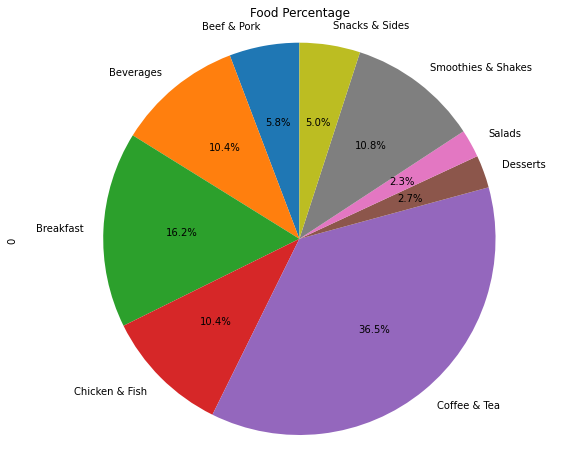

In [11]:
# Presentase Category
category_diff = pd.get_dummies(df_menu['Category']) 
category_percentage = category_diff.mean(axis=0)

table_percent = pd.DataFrame(category_percentage)
table_percent
table_percent[0].plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=False,             
                            title = 'Food Percentage')

plt.axis('equal') 

plt.show()

#### So based on the pie chart above, coffee & tea has a largest variation of menu whilst salads shows the lowest variation

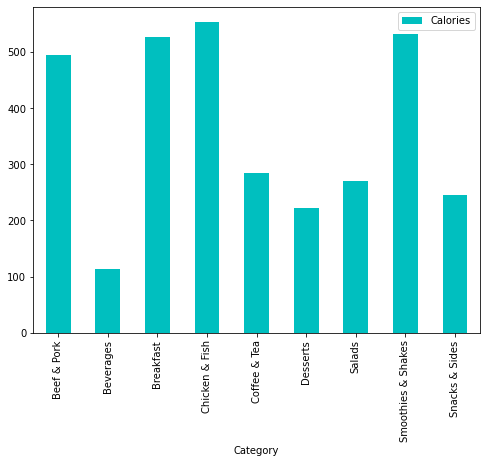

In [12]:
df_menu.pivot_table('Calories', 'Category').plot(kind='bar', stacked=True, color = 'c',figsize = (8,6))

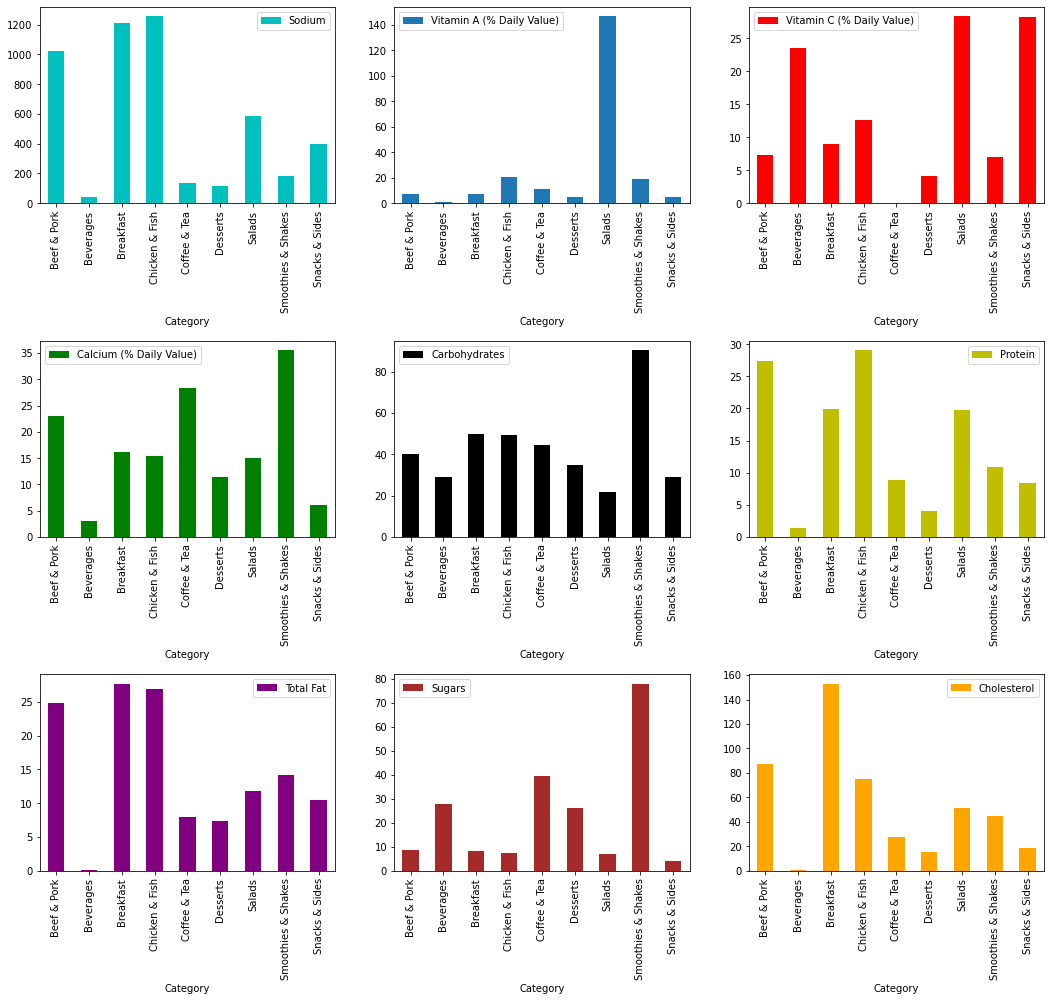

In [13]:
fig = plt.figure()

#Add Subplots
ax0 = fig.add_subplot(331)
ax1 = fig.add_subplot(332)
ax2 = fig.add_subplot(333)
ax3 = fig.add_subplot(334) 
ax4 = fig.add_subplot(335)
ax5 = fig.add_subplot(336)
ax6 = fig.add_subplot(337)
ax7 = fig.add_subplot(338)
ax8 = fig.add_subplot(339)

#Adjust Figure Plot Size
fig.subplots_adjust(wspace=0.2, hspace=0.7, left=0.125, right=0.9, top=0.9, bottom=0.1)

#Plot Calories to ax0
df_menu.pivot_table('Sodium', 'Category').plot(kind='bar', stacked=True, color = 'c',figsize = (18,15), ax=ax0)
#plot Vitamin A to ax1
df_menu.pivot_table('Vitamin A (% Daily Value)', 'Category').plot(kind='bar', stacked=True,figsize = (18,15), ax=ax1)
#plot vitamin C to ax2
df_menu.pivot_table('Vitamin C (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'r', figsize=(18,15), ax=ax2)

#plot Calcium to ax3
df_menu.pivot_table('Calcium (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'g',figsize=(18,15), ax=ax3)
#plot carbs to ax4
df_menu.pivot_table('Carbohydrates', 'Category').plot(kind='bar', stacked=True, color = 'black',figsize=(18,15), ax=ax4)
#plot protein to ax5
df_menu.pivot_table('Protein', 'Category').plot(kind='bar', stacked=True, color = 'y',figsize=(18,15), ax=ax5)

#plot Total Fat to ax6
df_menu.pivot_table('Total Fat', 'Category').plot(kind='bar', stacked=True, color = 'purple',figsize=(18,15), ax=ax6)
#plot Sugars to ax7
df_menu.pivot_table('Sugars', 'Category').plot(kind='bar', stacked=True, color = 'Brown',figsize=(18,15), ax=ax7)
#plot cholesterol to ax8
df_menu.pivot_table('Cholesterol', 'Category').plot(kind='bar', stacked=True, color = 'orange',figsize=(18,15), ax=ax8)
    
plt.show()

From pivot table bar chart above, I obtained the average of 9 value meal categories for each chosen nutrition values. According to the early problem identification, we can see the calories average. Chicken & Fish has the largest calories average. Despite the calories, We see that salads contain a record amount of vitamin A compared to dishes from other categories. After all, vitamin A is rich in many vegetables, as well as fish and eggs.

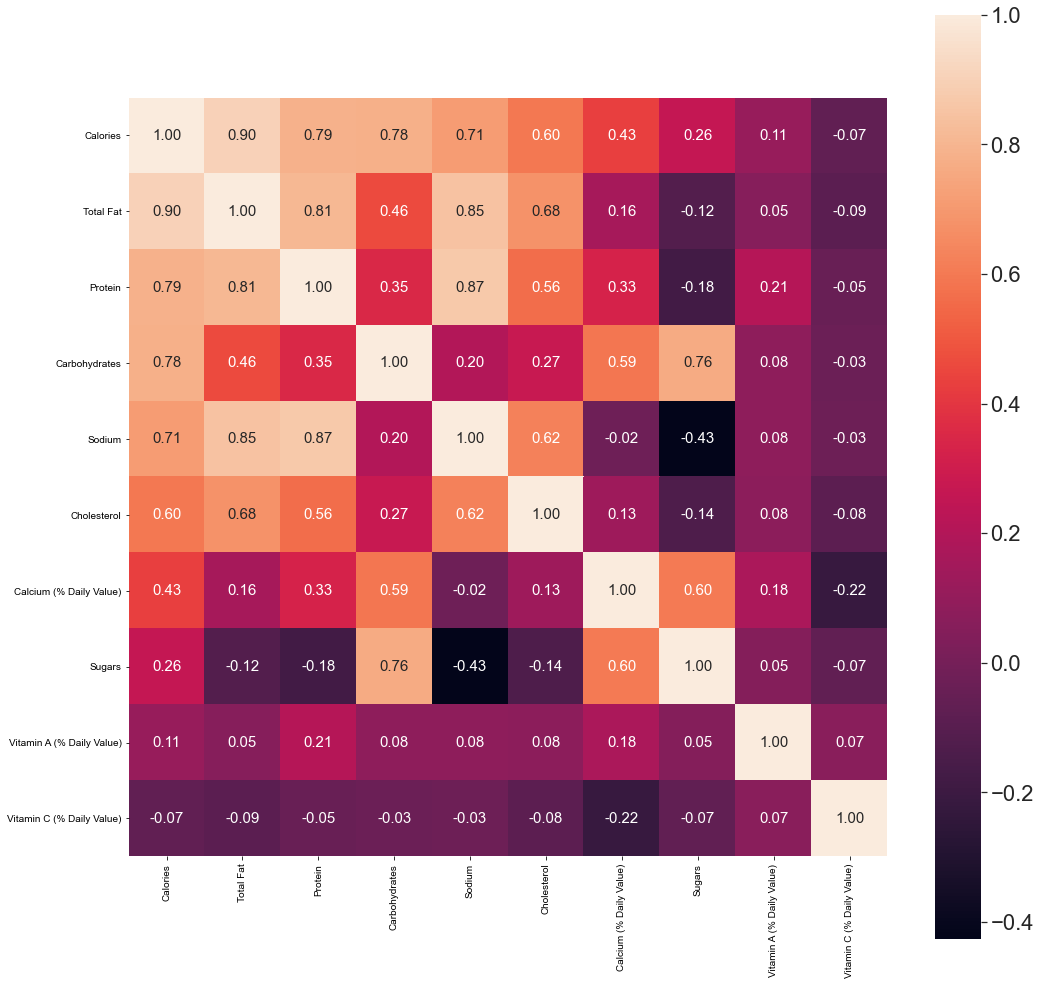

In [14]:
corrmat = df_menu.corr()
f, ax = plt.subplots(figsize=(17,17))
k = 21
cols = corrmat.nlargest(k, 'Calories')['Calories'].index #cols for correlations
cm = np.corrcoef(df_menu[cols].values.T,)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The correlation matrix above confirmed that Calories has a high correlation with Total Fat, Protein, Carbohydrates, Sodium, dan Cholesterol. So based on this, we can assume that increased calories will also increasing the amount of Total fat and cholesterol. Totally bad for your body

# Exploratory Data Analysis

### Problem 1 

**How many calories does the average McDonald's value meal contain?** 

368.2692307692308
340.0


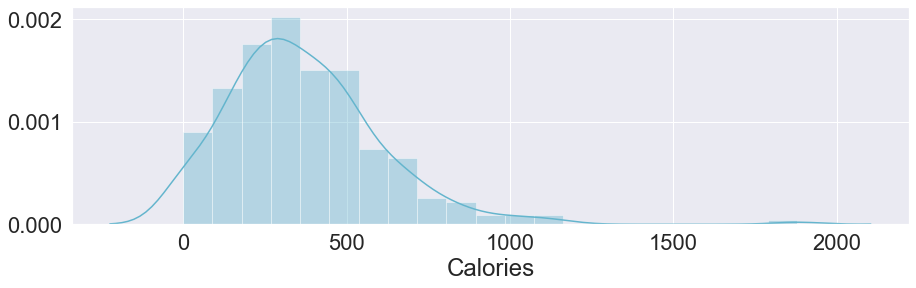

In [15]:
#CALOROIES BREAKDOWN
print(df_menu.Calories.mean())
print(df_menu.Calories.median())

#CALROIES DISTRIBUTION GRAPH
axes=plt.subplots (1,1,figsize=(15,4))
ax = sns.distplot(df_menu['Calories'],kde=True,hist=True,color="c")

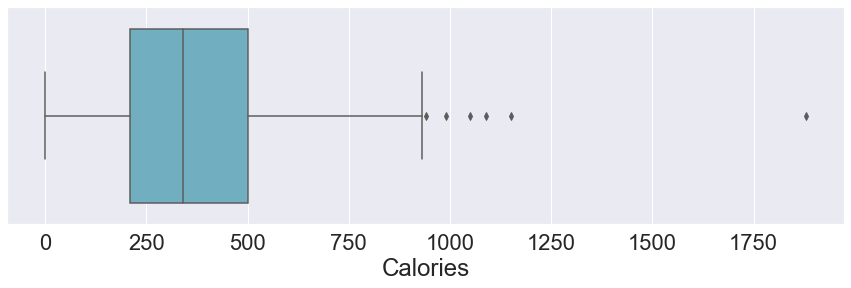

In [16]:
axes=plt.subplots (1,1,figsize=(15,4))
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_menu["Calories"], color = 'c')

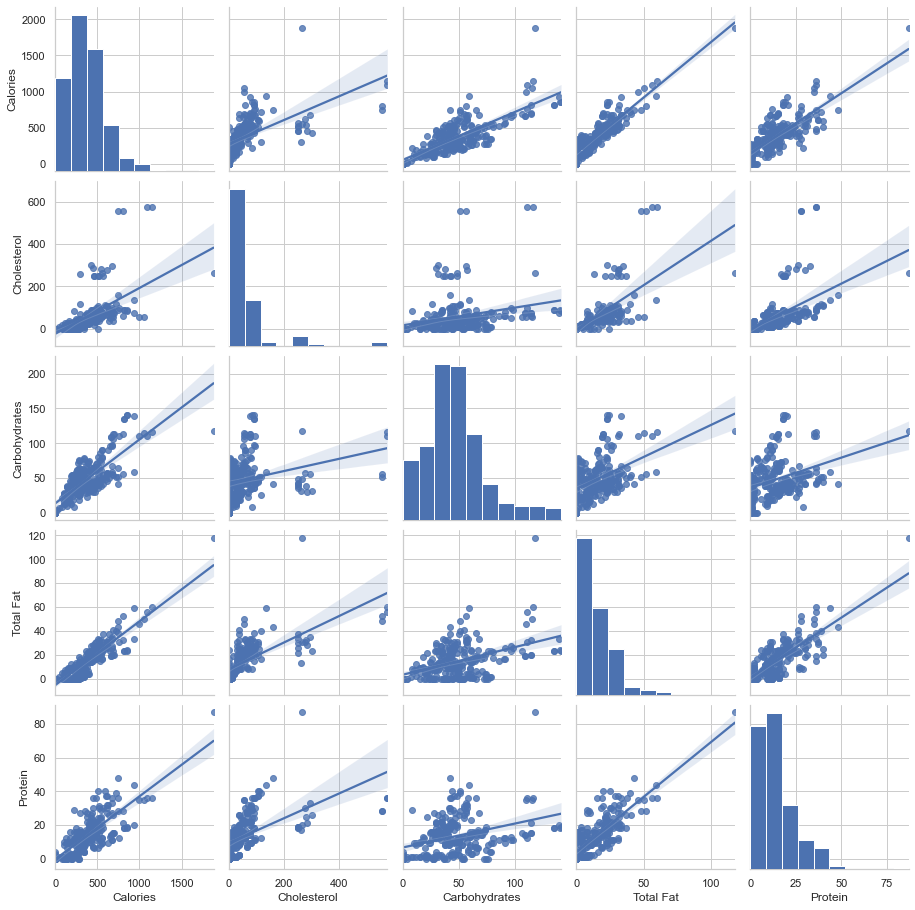

In [17]:
sns.pairplot(df_menu,vars=["Calories", "Cholesterol", "Carbohydrates", "Total Fat", "Protein"],kind ='reg')

## Conclusion
Average calories values for McDonalds value meal (Food + Drinks) is **368 kkal**

## Problem 2

**How much do beverages, like soda or coffee, contribute to the overall caloric intake?** 

In [18]:
meals = []
beverages =[]
for i in range(len(df_menu)):
    if df_menu.Category[i] == 'Breakfast':
        meals.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])
    elif df_menu.Category[i] == 'Beef & Pork':
        meals.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])
    elif df_menu.Category[i] == 'Chicken & Fish':
        meals.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])
    elif df_menu.Category[i] == 'Salads':
        meals.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])
    elif df_menu.Category[i] == 'Snacks & Sides':
        meals.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])
    elif df_menu.Category[i] == 'Desserts':
        meals.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])
    else:
        beverages.append([df_menu.Category[i],df_menu.Item[i],df_menu.Calories[i]])

In [19]:
data_meals = pd.DataFrame(meals, columns=["Category", "Item","Calories"])
data_beverages = pd.DataFrame(beverages, columns=["Category", "Item","Calories"])
data_meals
data_meals.mean()

Calories    462.090909
dtype: float64

['beverages' 'Coffee & Tea' 'Smoothies & Shakes']


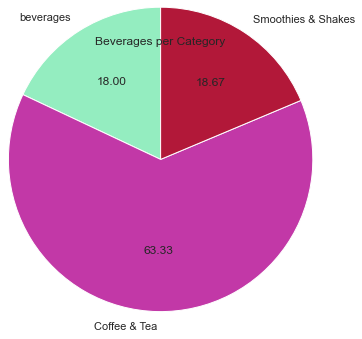

In [20]:
categories = np.array(['beverages', 'Coffee & Tea', 'Smoothies & Shakes'])
print(categories)

beverages = df_menu[df_menu.Category == 'Beverages']
coffee_tea = df_menu[df_menu.Category == 'Coffee & Tea']
smoothies_shakes = df_menu[df_menu.Category == 'Smoothies & Shakes']
amtPerCategory = np.array([beverages.shape[0],
                           coffee_tea.shape[0],
                           smoothies_shakes.shape[0]])
colors = np.array(['#94edc0', '#c238a7', '#b21839', '#432f13'])
plt.pie(amtPerCategory, labels=categories, colors=colors,startangle=90,shadow=False, autopct='%1.2f',radius = 1.75)
plt.title("Beverages per Category")
plt.gca().set_aspect('equal')

### Conclusion
So Coffee & Tea contribute approximately 63.33% of caloric intake. Moreover, beverages and smoothies & shakes contribute 18% and 18.67% caloric intake respectively

## Problem 3

**Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?** 

<Figure size 576x288 with 0 Axes>

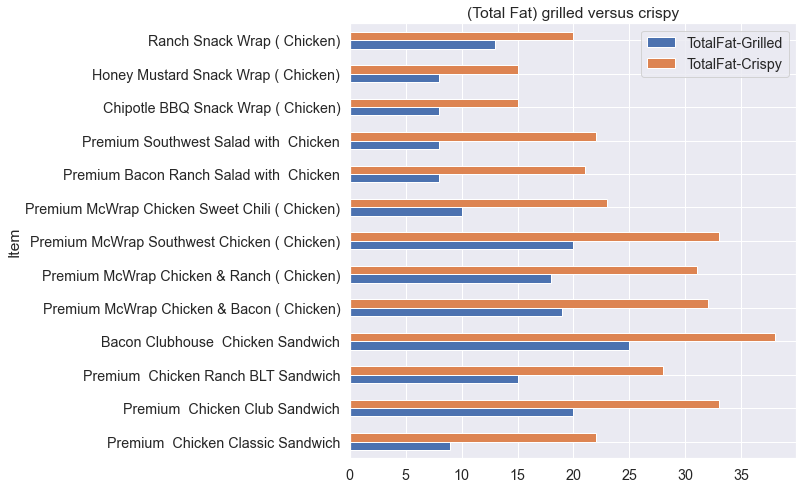

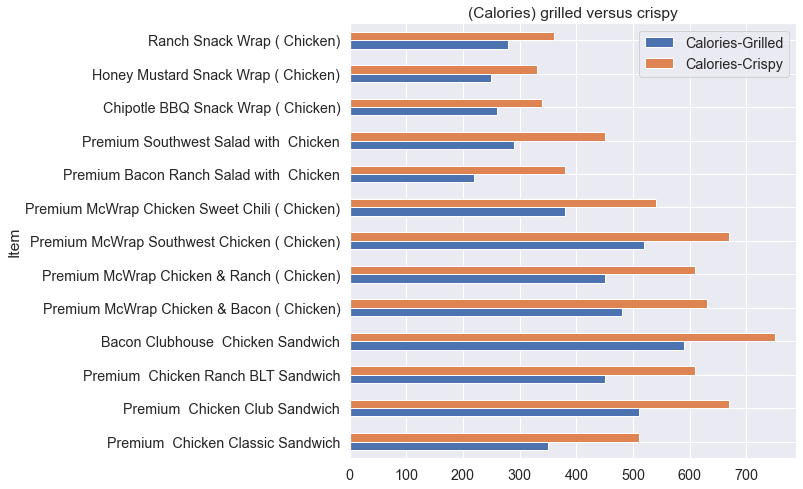

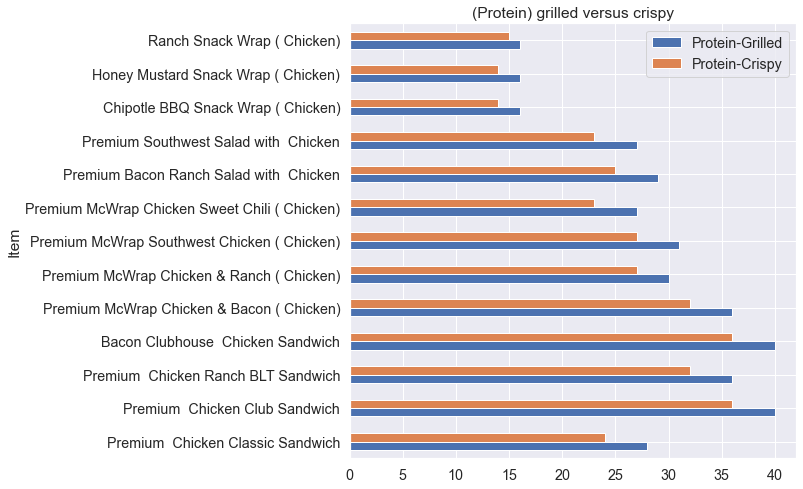

In [21]:
sns.set(font_scale=1.3)
plt.figure(figsize=(8, 4))

df_menu['isGrilled']=df_menu.Item.str.contains("Grilled")
df_menu['hasEggWhites']=df_menu.Item.str.contains("Egg Whites")

crispy_chick1=df_menu.loc[df_menu.isGrilled==True,'Item'].str.replace('Grilled','Crispy')
crispy_chick=df_menu.loc[df_menu.Item.isin(crispy_chick1),['Item','Total Fat','Calories','Protein']]
grilled_chick=df_menu.loc[df_menu.isGrilled==True,['Item','Total Fat','Calories','Protein']]

chick1=grilled_chick.reset_index(drop=True).merge(crispy_chick.reset_index(drop=True),left_index=True,right_index=True)
chick1.columns=['Items-Grilled','TotalFat-Grilled','Calories-Grilled','Protein-Grilled','Items-Crispy','TotalFat-Crispy','Calories-Crispy','Protein-Crispy']
chick1=chick1.drop('Items-Crispy',axis=1)
chick1['Item']=chick1['Items-Grilled'].str.replace("Grilled","")
chick1=chick1.drop('Items-Grilled',axis=1)
chick1.index=chick1.Item
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
chick1.reindex(columns=['TotalFat-Grilled','TotalFat-Crispy','Item']).plot(kind='barh',title="(Total Fat) grilled versus crispy")
chick1.reindex(columns=['Calories-Grilled','Calories-Crispy','Item']).plot(kind='barh',title="(Calories) grilled versus crispy")
chick1.reindex(columns=['Protein-Grilled','Protein-Crispy','Item']).plot(kind='barh',title="(Protein) grilled versus crispy")

## Conclusion
Grilled chicken contain **less calories and total fat** compared to Crispy Chicken. However, if we look on the **protein values** on the Grilled chicken, it is **much higher** than Crispy Chicken. From this results, we can suggests that if you on dietary or in gym program, Grilled chicken is the best choice for you!

### Problem 4

**What about ordering egg whites instead of whole eggs?**

In [22]:
putih = df_menu[df_menu['Item'].str.contains('Egg White')]
putih

,Category,Item,Serving Size,Calories,Total Fat,Sugars,Cholesterol,Sodium,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Carbohydrates,isGrilled,hasEggWhites
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,8.0,3,25,770,18,6,0,25,30,False,False
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,23.0,2,50,880,21,6,0,25,30,False,True
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,20.0,3,35,1300,20,2,8,15,36,False,True
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,25.0,4,35,1420,20,6,8,15,42,False,True
14,Breakfast,Sausage Biscuit with Egg Whites (Regular Biscuit),5.9 oz (167 g),460,27.0,3,35,1180,18,0,0,8,34,False,True
15,Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),6.4 oz (181 g),520,32.0,3,35,1290,18,4,0,8,40,False,True
20,Breakfast,"Bacon, Egg & Cheese McGriddles with Egg Whites",6.3 oz (178 g),400,15.0,16,35,1250,20,2,10,15,47,False,True
23,Breakfast,"Sausage, Egg & Cheese McGriddles with Egg Whites",7.2 oz (205 g),500,26.0,15,50,1320,21,2,0,20,46,False,True
25,Breakfast,"Bacon, Egg & Cheese Bagel with Egg Whites",7.1 oz (201 g),570,25.0,8,60,1480,30,10,15,20,55,False,True
29,Breakfast,Big Breakfast with Egg Whites (Regular Biscuit),9.6 oz (272 g),640,37.0,3,35,1590,26,0,2,10,50,False,True


First of all, i want to see the total calories of Mcdonalds's menu with white egg

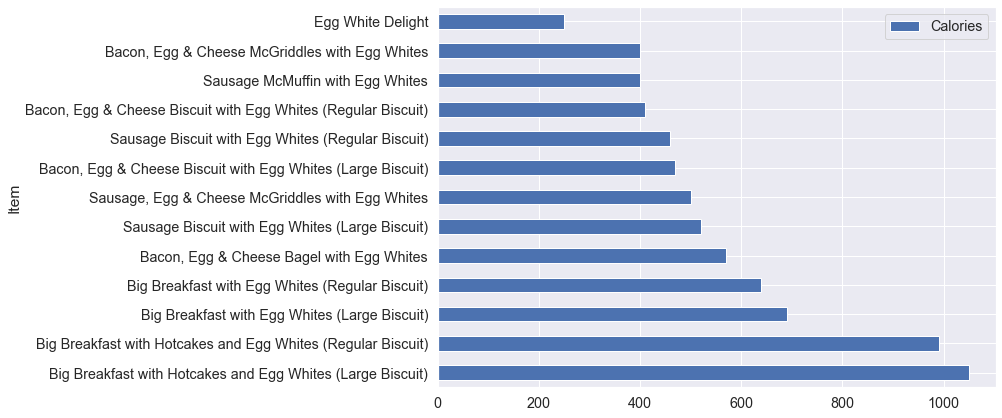

In [23]:
putih_cal = pd.DataFrame({'Item' : putih.Item, 'Calories' : putih.Calories})
putih_sort = putih_cal.sort_values('Calories', ascending=False)
putih_sort.plot.barh(x='Item', y='Calories', figsize=(10,7))

In [24]:
campur = df_menu[df_menu['Item'].str.contains('Egg')]
campur = campur[~campur['Item'].str.contains('White')]
campur

,Category,Item,Serving Size,Calories,Total Fat,Sugars,Cholesterol,Sodium,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Carbohydrates,isGrilled,hasEggWhites
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,13.0,3,260,750,17,10,0,25,31,False,False
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,28.0,2,285,860,21,15,0,30,30,False,False
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,23.0,3,300,960,26,15,2,30,31,False,False
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,26.0,3,250,1300,19,10,8,15,38,False,False
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,30.0,4,250,1410,19,15,8,20,43,False,False
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,33.0,2,250,1170,18,6,0,10,36,False,False
13,Breakfast,Sausage Biscuit with Egg (Large Biscuit),6.2 oz (177 g),570,37.0,3,250,1280,18,10,0,10,42,False,False
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),7.1 oz (201 g),540,32.0,3,280,1470,25,10,2,20,38,False,False
19,Breakfast,"Bacon, Egg & Cheese McGriddles",6.1 oz (174 g),460,21.0,15,250,1250,19,10,10,20,48,False,False
22,Breakfast,"Sausage, Egg & Cheese McGriddles",7.1 oz (201 g),550,31.0,15,265,1320,20,10,0,20,48,False,False


Next step is doing the same as white egg but this one on whole egg

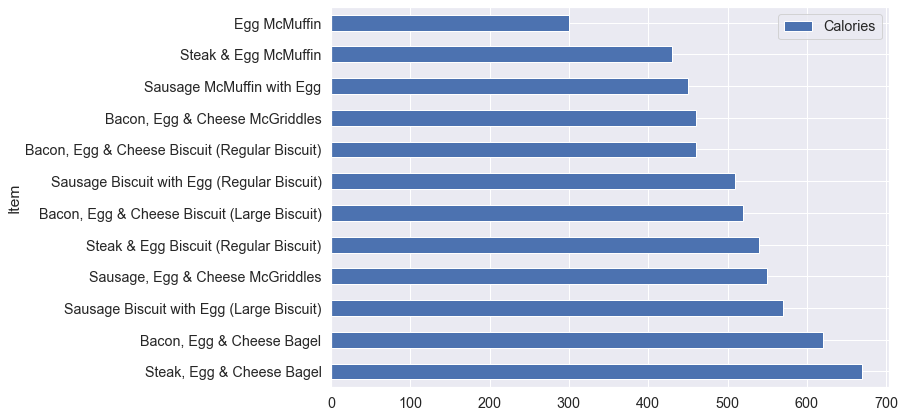

In [25]:
campur_cal = pd.DataFrame({'Item' : campur.Item, 'Calories' : campur.Calories})
campur_sort = campur_cal.sort_values('Calories', ascending=False)
campur_sort.plot.barh(x='Item', y='Calories', figsize=(10,7))

Rata-Rata kalori pada menu yang memakai putih telur =  565.38 Calories.
Rata-Rata kalori pada menu yang memakai telur utuh =  506.67 Calories.


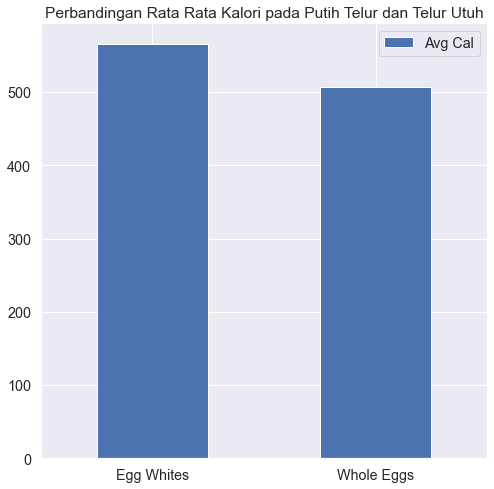

In [26]:
#Rata Rata nutrisi yang pake putih telor vs telor utuh

#1 Putih Telor
avg_putih_cal = putih.Calories.mean(axis=0)
print('Rata-Rata kalori pada menu yang memakai putih telur = ', round(avg_putih_cal,2), 'Calories.')

#2 Telor Utuh
avg_campur_cal = campur.Calories.mean(axis=0)
print('Rata-Rata kalori pada menu yang memakai telur utuh = ', round(avg_campur_cal,2), 'Calories.')

#Perbandingan Chart
avg_telur_cal = [avg_putih_cal, avg_campur_cal]
index = ['Egg Whites', 'Whole Eggs']
avg_telur_cal = pd.DataFrame({'Avg Cal': avg_telur_cal,}, index=index)
ax = avg_telur_cal.plot.bar(rot=0)
ax.set_title('Perbandingan Rata Rata Kalori pada Putih Telur dan Telur Utuh')
campur_sort = putih_cal.sort_values('Calories', ascending=False)

From the comparison results, we get the conclusion that **whole eggs** menu has a **lower calories average** compared to **white eggs**

## Problem 5

**What is the least number of items could you order from the menu to meet one day's nutritional requirements?**

To find the insight about this current problem, we make an approach to literature that confirm about maximum calories amount of 2000 kcal to fulfill the one day nutrition. In order to do this, I try to sort the dataset first into several chosen nutrition based on correlation matrix above.

In [27]:
df_menu.sort_values(['Category','Calories','Total Fat', 'Carbohydrates', 'Sugars', 'Protein'], ascending = False).head(20)

,Category,Item,Serving Size,Calories,Total Fat,Sugars,Cholesterol,Sodium,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Carbohydrates,isGrilled,hasEggWhites
98,Snacks & Sides,Large French Fries,5.9 oz (168 g),510,24.0,0,0,290,6,0,70,2,67,False,False
94,Snacks & Sides,Ranch Snack Wrap (Crispy Chicken),4.5 oz (128 g),360,20.0,3,40,810,15,2,0,10,32,False,False
97,Snacks & Sides,Medium French Fries,3.9 oz (111 g),340,16.0,0,0,190,4,0,45,2,44,False,False
90,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),4.6 oz (130 g),340,15.0,8,30,780,14,4,0,10,37,False,False
92,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),4.3 oz (123 g),330,15.0,3,35,730,14,2,0,10,34,False,False
95,Snacks & Sides,Ranch Snack Wrap (Grilled Chicken),4.3 oz (121 g),280,13.0,2,45,720,16,2,2,10,25,True,False
91,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),4.3 oz (123 g),260,8.0,7,40,700,16,4,2,10,30,True,False
93,Snacks & Sides,Honey Mustard Snack Wrap (Grilled Chicken),4.1 oz (116 g),250,8.0,2,45,650,16,2,2,10,27,True,False
96,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,11.0,0,0,130,2,0,30,0,30,False,False
102,Snacks & Sides,Fruit 'n Yogurt Parfait,5.2 oz (149 g),150,2.0,23,5,70,4,2,15,10,30,False,False


After that, I choose one menu randomly for each 9 menu category to see the specific calories. Before move too far, I assume the calories unit in the dataset as kilo calories (kcal)

In [28]:
import numpy as np

dfx=pd.DataFrame(df_menu.iloc[[3,47,54,82,98,108,112,231,253], [1,3]])
dfx

,Item,Calories
3,Sausage McMuffin with Egg,450
47,Double Quarter Pounder with Cheese,750
54,Daily Double,430
82,Chicken McNuggets (40 piece),1880
98,Large French Fries,510
108,Hot Caramel Sundae,340
112,Coca-Cola Classic (Large),280
231,Frappé Chocolate Chip (Large),760
253,McFlurry with M&M’s Candies (Medium),930


In [29]:
z=0
while z <9:
    print("Counting minimum amounts of", dfx.iloc[z,0] ,"To fulfill one day's nutritional requirements\n")

    a=dfx.iloc[z,1]
    i=0

    while a<2000:
        a=a+dfx.iloc[z,1]
        i=i+1   
        print("It took",i+1 ,"Items of",dfx.iloc[z,0]+"\n")
        
    z+=1
    print("\n")

Counting minimum amounts of Sausage McMuffin with Egg To fulfill one day's nutritional requirements

It took 2 Items of Sausage McMuffin with Egg

It took 3 Items of Sausage McMuffin with Egg

It took 4 Items of Sausage McMuffin with Egg

It took 5 Items of Sausage McMuffin with Egg



Counting minimum amounts of Double Quarter Pounder with Cheese To fulfill one day's nutritional requirements

It took 2 Items of Double Quarter Pounder with Cheese

It took 3 Items of Double Quarter Pounder with Cheese



Counting minimum amounts of Daily Double To fulfill one day's nutritional requirements

It took 2 Items of Daily Double

It took 3 Items of Daily Double

It took 4 Items of Daily Double

It took 5 Items of Daily Double



Counting minimum amounts of Chicken McNuggets (40 piece) To fulfill one day's nutritional requirements

It took 2 Items of Chicken McNuggets (40 piece)



Counting minimum amounts of Large French Fries To fulfill one day's nutritional requirements

It took 2 Items of L

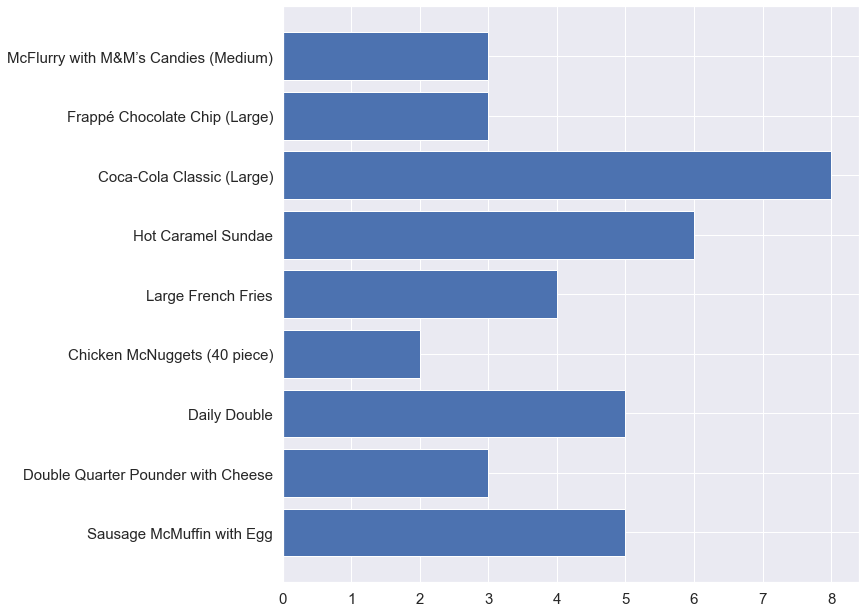

In [30]:
import matplotlib.pyplot as plot
fig = plot.figure()
ax = fig.add_axes([0,0,1,1])
t = [dfx.iloc[0,0], dfx.iloc[1,0], dfx.iloc[2,0], dfx.iloc[3,0], dfx.iloc[4,0], dfx.iloc[5,0], dfx.iloc[6,0], dfx.iloc[7,0], dfx.iloc[8,0],]
s = [5,3,5,2,4,6,8,3,3]

ax.tick_params(axis='both', which='major', labelsize=15)
ax.barh(t,s)
plot.show()

On the visualization above, we can see the minimum amount of chosen menu that we can pick while ordering a menu.

In [35]:
dfc=pd.DataFrame(s,t)
dfc.columns=["Minimum Order Amount"]
dfc

,Minimum Order Amount
Sausage McMuffin with Egg,5
Double Quarter Pounder with Cheese,3
Daily Double,5
Chicken McNuggets (40 piece),2
Large French Fries,4
Hot Caramel Sundae,6
Coca-Cola Classic (Large),8
Frappé Chocolate Chip (Large),3
McFlurry with M&M’s Candies (Medium),3


## Conclusion
From the analysis above, we obtained the minimum amount of menu that we can order as listed below :

- **Sausage McMuffin with Egg**                   = 5 Pcs
- **Double Quarter Pounder with Cheese**          = 3 Pcs
- **Chicken McNuggets (40 Piece)**                = 2 Pcs
- **Large French Fries**                          = 4 Pcs
- **Hot Caramel Sundae**                          = 6 Pcs
- **Coca-Cola Classic (Large)**                   = 8 Pcs
- **Frappe Chocolate Chip (Large)**               = 3 Pcs
- **McFlurry with M&M's Candies (Medium)**        = 3 Pcs

If we assume that McDonald's serve a value meal package consists of **Double Quarter Pounder With Cheese**, **Large French Fries** plus **Coca-Cola Classic (Large)** for 1 pcs respectively, then we get a total calories value for about **1540 kcal**. With those high calories value, it will automatically deliver a high amount of **Cholesterol** and **Total Fat**, In other words, it is **Unhealthy**

## Food Recommendation

I try to make some simple recommender system based on dietary needs or gym program for specific nutrition substances that we can fill as we like.

In [32]:
#User Input Desired Nutrition
calories = input("Enter Calories: ")
fatpercent = input("Enter Total Fat %: ")
#Because we generally want more protein in meals
protein = input("Enter Min Amount of Protein: ")

Enter Calories: 1000
Enter Total Fat %: 20
Enter Min Amount of Protein: 20


In [36]:
#Filters data frame for all values within inputs and saves into new data frame
filtered = df_menu[(df_menu['Calories'] < int(calories)) & (df_menu['Total Fat'] < int(fatpercent)) & (df_menu['Protein'] > int(protein))]
filtered = filtered.sort_values('Calories', ascending=False)
filtered = filtered.sort_values('Total Fat', ascending=False)
filtered = filtered.sort_values('Protein', ascending=False)

#Suggests 10 foods within the specifified values
print("Here are some suggested options for you!")
print("")
filtered.head(10)

Here are some suggested options for you!



,Category,Item,Serving Size,Calories,Total Fat,Sugars,Cholesterol,Sodium,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Carbohydrates,isGrilled,hasEggWhites
71,Chicken & Fish,Premium McWrap Chicken & Bacon (Grilled Chicken),10.7 oz (302 g),480,19.0,6,95,1370,36,60,25,20,42,True,False
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,7.6 oz (217 g),450,15.0,9,90,1230,36,4,20,15,43,True,False
73,Chicken & Fish,Premium McWrap Chicken & Ranch (Grilled Chicken),10.5 oz (297 g),450,18.0,6,80,1170,30,60,15,15,42,True,False
86,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8.5 oz (241 g),220,8.0,4,85,690,29,110,30,15,8,True,False
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,9.0,8,65,820,28,4,8,15,42,True,False
77,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Grilled Ch...,10.3 oz (291 g),380,10.0,12,65,1090,27,60,15,8,47,True,False
89,Salads,Premium Southwest Salad with Grilled Chicken,11.8 oz (335 g),290,8.0,10,70,680,27,170,30,15,28,True,False
52,Beef & Pork,McDouble,5.2 oz (147 g),380,17.0,7,75,840,22,6,2,20,34,False,False
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,5.6 oz (160 g),430,19.0,7,45,910,21,4,2,15,43,False,False
